In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt 


In [92]:
df = pd.read_csv('heart.csv',header=None)

df.columns = ['age','sex','cp','testbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Target']
df.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
counter = 0
missing_colunm = []
for x in df.columns:
    if len(df.loc[(df[x] == '?')]) > 0:
        counter +=1
        missing_colunm.append(x)
print(missing_colunm)


       

[]


In [95]:
df.dtypes

age          int64
sex          int64
cp           int64
testbps      int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
Target       int64
dtype: object

In [96]:
X = df.drop('Target' ,axis =1).copy()
X.head()

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [97]:
y= df['Target'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [98]:
X_encoded = pd.get_dummies(X, columns = ['cp','thal','ca','slope','restecg'])
X_encoded.head()

,age,sex,testbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,0,1,0,1,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

#tree_clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
#tree_clf = DecisionTreeClassifier(criterion="gini",random_state=0)
tree_clf = DecisionTreeClassifier(random_state=0)

tree_clf = tree_clf.fit(X_train,y_train)

y_predict = tree_clf.predict(X_test)
y_predict2 = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict2,y_train))



Accuracy for test data: 0.8032786885245902
Accuracy for train data: 1.0


[Text(0.48197115384615385, 0.9545454545454546, 'thal_2 <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [111, 131]\nclass = heart disesa'),
 Text(0.22115384615384615, 0.8636363636363636, 'cp_0 <= 0.5\ngini = 0.366\nsamples = 108\nvalue = [82, 26]\nclass = no heart disesa'),
 Text(0.09615384615384616, 0.7727272727272727, 'ca_0 <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [16, 18]\nclass = heart disesa'),
 Text(0.057692307692307696, 0.6818181818181818, 'testbps <= 125.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = no heart disesa'),
 Text(0.038461538461538464, 0.5909090909090909, 'oldpeak <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = heart disesa'),
 Text(0.019230769230769232, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = heart disesa'),
 Text(0.057692307692307696, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no heart disesa'),
 Text(0.07692307692307693, 0.5909090909090909, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = no heart disesa'),
 Text(0.1346

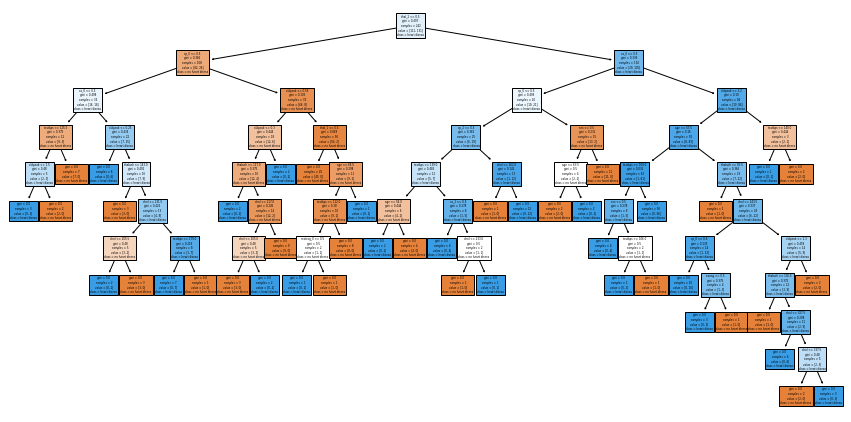

In [104]:
plt.figure(figsize=[15,7.5])

plot_tree(tree_clf,filled= True,class_names=["no heart disesa", "heart disesa"], feature_names= X_encoded.columns)

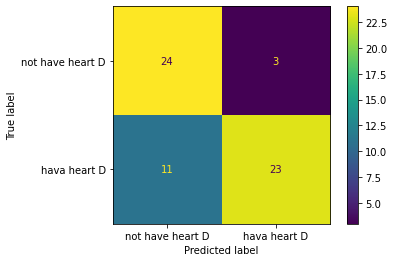

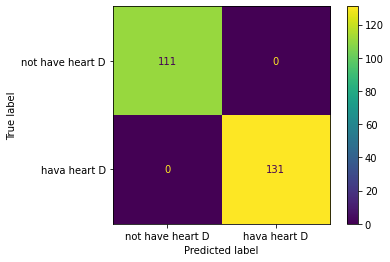

In [23]:

metrics.ConfusionMatrixDisplay.from_estimator(tree_clf,X_test,y_test,display_labels=[ "not have heart D","hava heart D"])
metrics.ConfusionMatrixDisplay.from_estimator(tree_clf,X_train,y_train,display_labels=[ "not have heart D","hava heart D"])

In [105]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00271039 0.00344353 0.00371901 0.00383707 0.0042503
 0.00550964 0.0060355  0.00708383 0.00716253 0.0072314  0.00762873
 0.00772339 0.0078274  0.00816235 0.00827891 0.00929752 0.0094451
 0.0099716  0.01196579 0.030427   0.03151    0.0341737  0.14563765]


In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

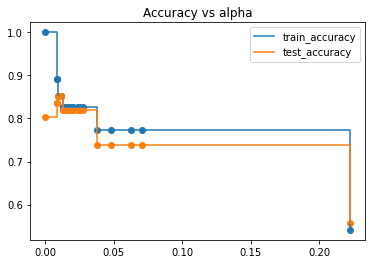

In [26]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


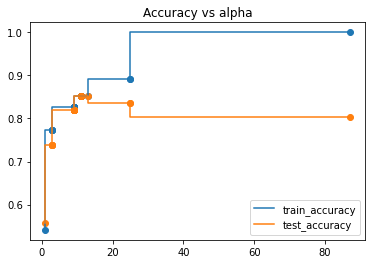

In [27]:
train_acc = []
test_acc = []
tree_size_train=[]
tree_size_test=[]

for c in clfs:
    y_predect_train = c.predict(X_train)
    y_predect_test = c.predict(X_test)
    tree_size_train.append(c.tree_.node_count)
    train_acc.append(metrics.accuracy_score(y_predect_train, y_train))
    test_acc.append(metrics.accuracy_score(y_predect_test, y_test))
    
plt.scatter(tree_size_train,train_acc)
plt.scatter(tree_size_train,test_acc)
plt.plot(tree_size_train,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(tree_size_train,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [28]:
tree_clf = DecisionTreeClassifier(criterion="entropy",random_state=0,ccp_alpha=0.03)
tree_clf = tree_clf.fit(X_train,y_train)

y_predict = tree_clf.predict(X_test)
y_predict2 = tree_clf.predict(X_train)

print("Accuracy for test data:",metrics.accuracy_score(y_predict,y_test))
print("Accuracy for train data:",metrics.accuracy_score(y_predict2,y_train))


Accuracy for test data: 0.819672131147541
Accuracy for train data: 0.859504132231405


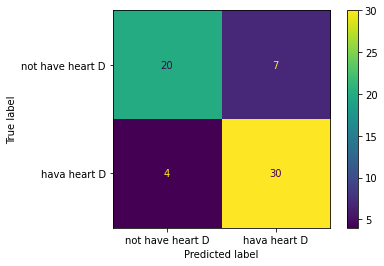

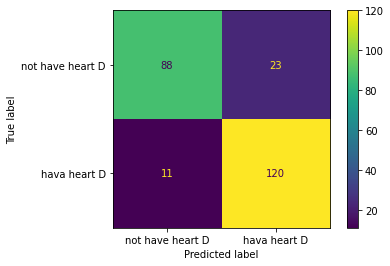

In [29]:
metrics.ConfusionMatrixDisplay.from_estimator(tree_clf,X_test,y_test,display_labels=[ "not have heart D","hava heart D"])
metrics.ConfusionMatrixDisplay.from_estimator(tree_clf,X_train,y_train,display_labels=[ "not have heart D","hava heart D"])

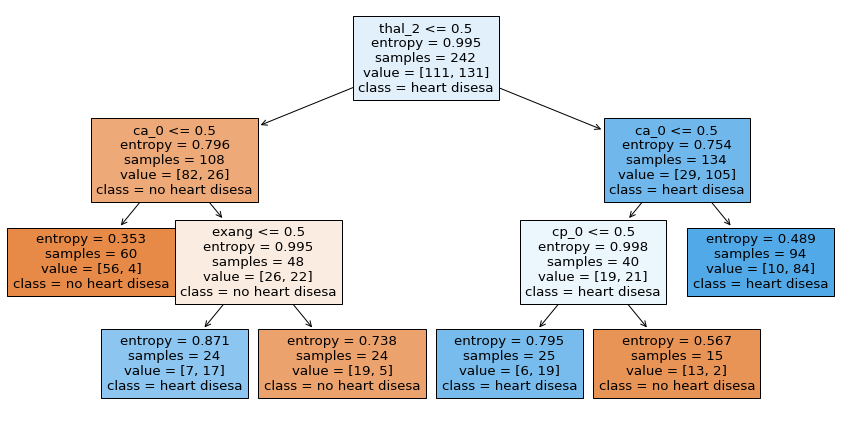

In [30]:
plt.figure(figsize=[15,7.5])

plot_tree(tree_clf,filled= True,class_names=["no heart disesa", "heart disesa"], feature_names= X_encoded.columns);